# Deskriptive Statistiken und Visualisierungen

## 1. Dataframes erstellen und mergen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
base = Path.cwd()  # oder Path("/workspaces/datascience-project-new")
umsatz_path = base / "data" / "umsatzdaten_gekuerzt.csv"
wetter_path = base / "data" / "wetter.csv"
kiwo_path = base / "data" / "kiwo.csv"

if not umsatz_path.exists():
    raise FileNotFoundError(f"{umsatz_path} nicht gefunden. Aktueller Ordner: {base}")

df1 = pd.read_csv(umsatz_path)
df2 = pd.read_csv(wetter_path)
df3 = pd.read_csv(kiwo_path)

# Erst df1 mit df2 verbinden
df_merged = df1.merge(df2, on='Datum', how='left')

# Dann das Ergebnis mit df3 verbinden
df_final = df_merged.merge(df3, on='Datum', how='left')

print(df_final.shape)  # zeigt Anzahl Zeilen und Spalten
df_final.head()        # zeigt die ersten 5 Zeilen

(9334, 9)


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


## 2. Infos ausgeben lassen

In [2]:
df_final.info()         # zeigt Informationen über den DataFrame
print(df_final.isnull().sum())  # zeigt Anzahl der fehlenden Werte pro Spalte

# print(df_final)  # zeigt den gesamten DataFrame (kann bei großen DataFrames unübersichtlich sein)
print(df_final)

df_final.describe()     # zeigt statistische Zusammenfassung der numerischen Spalten

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9334 non-null   int64  
 1   Datum                9334 non-null   object 
 2   Warengruppe          9334 non-null   int64  
 3   Umsatz               9334 non-null   float64
 4   Bewoelkung           9264 non-null   float64
 5   Temperatur           9318 non-null   float64
 6   Windgeschwindigkeit  9318 non-null   float64
 7   Wettercode           7009 non-null   float64
 8   KielerWoche          223 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 656.4+ KB
id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
KielerWoche            9111
dtype: int64
           id  

,id,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
count,9.334000e+03,9334.000000,9334.000000,9264.000000,9318.000000,9318.000000,7009.000000,223.0
mean,1.559311e+06,3.088172,206.749044,4.720747,12.028483,10.974780,36.900128,1.0
std,1.512503e+05,1.489002,144.545189,2.646273,7.232829,4.131974,27.095884,0.0
min,1.307011e+06,1.000000,7.051201,0.000000,-8.475000,3.000000,0.000000,1.0
25%,1.410123e+06,2.000000,96.897441,3.000000,6.237500,8.000000,10.000000,1.0
50%,1.601102e+06,3.000000,161.900831,6.000000,11.625000,10.000000,28.000000,1.0
75%,1.704223e+06,4.000000,280.644663,7.000000,17.962500,13.000000,61.000000,1.0
max,1.807315e+06,6.000000,1879.461831,8.000000,31.437500,35.000000,95.000000,1.0


In [3]:
# convert 'Datum' column to datetime and extract weekday names
df_final['Datum'] = pd.to_datetime(df_final['Datum'])
df_final['Wochentag'] = df_final['Datum'].dt.day_name()
print(df_final)


           id      Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0     1307011 2013-07-01            1  148.828353         6.0     17.8375   
1     1307021 2013-07-02            1  159.793757         3.0     17.3125   
2     1307031 2013-07-03            1  111.885594         7.0     21.0750   
3     1307041 2013-07-04            1  168.864941         7.0     18.8500   
4     1307051 2013-07-05            1  171.280754         5.0     19.9750   
...       ...        ...          ...         ...         ...         ...   
9329  1712216 2017-12-21            6   87.471228         7.0      6.2375   
9330  1712226 2017-12-22            6   71.911652         7.0      5.7625   
9331  1712236 2017-12-23            6   84.062223         7.0      7.8000   
9332  1712246 2017-12-24            6   60.981969         7.0      8.1125   
9333  1712276 2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag  
0          

In [4]:
# Holidays in Schleswig-Holstein, Germany

import holidays

# Jahre aus deinen Daten
start_year = df_final['Datum'].dt.year.min()
end_year = df_final['Datum'].dt.year.max()
years = range(start_year, end_year + 1)

# Erzeuge Feiertags-Objekt für Schleswig-Holstein (mehrere Varianten abfangen)
try:
    de_sh = holidays.CountryHoliday('DE', state='SH', years=years)
except Exception:
    try:
        de_sh = holidays.Germany(years=years, prov='SH')
    except Exception:
        de_sh = holidays.Germany(years=years, state='SH')

# Liste aller Feiertage im betrachteten Zeitraum
holidays_list = [(pd.to_datetime(d), name) for d, name in de_sh.items()
                 if start_year <= d.year <= end_year]
df_holidays = pd.DataFrame(holidays_list, columns=['Datum', 'Feiertag']).sort_values('Datum').reset_index(drop=True)

# Markiere Feiertage im Haupt-DataFrame
df_final['Feiertag_Name'] = df_final['Datum'].map(de_sh)       # Name oder NaN
df_final['is_Feiertag'] = df_final['Feiertag_Name'].notna()    # True/False

# Ausgabe
print(df_holidays)                  # alle Feiertage in SH im Zeitraum
print(df_final[['Datum','is_Feiertag','Feiertag_Name']].head())

        Datum                   Feiertag
0  2013-01-01                    Neujahr
1  2013-03-29                 Karfreitag
2  2013-04-01                Ostermontag
3  2013-05-01                 Erster Mai
4  2013-05-09        Christi Himmelfahrt
5  2013-05-20              Pfingstmontag
6  2013-10-03  Tag der Deutschen Einheit
7  2013-12-25       Erster Weihnachtstag
8  2013-12-26      Zweiter Weihnachtstag
9  2014-01-01                    Neujahr
10 2014-04-18                 Karfreitag
11 2014-04-21                Ostermontag
12 2014-05-01                 Erster Mai
13 2014-05-29        Christi Himmelfahrt
14 2014-06-09              Pfingstmontag
15 2014-10-03  Tag der Deutschen Einheit
16 2014-12-25       Erster Weihnachtstag
17 2014-12-26      Zweiter Weihnachtstag
18 2015-01-01                    Neujahr
19 2015-04-03                 Karfreitag
20 2015-04-06                Ostermontag
21 2015-05-01                 Erster Mai
22 2015-05-14        Christi Himmelfahrt
23 2015-05-25   

## Schulferien Daten

To-Do: Richtige API finden

In [6]:
!pip install requests

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.4-cp314-cp314-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp314-cp314-macosx_10_13_universal2.whl (207 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.11.12-py3-none-any.whl (159 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
pip install --upgrade pip

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
#Schulferien in Schleswig-Holstein, Germany - API leer
import requests
import pandas as pd

state = "schleswig-holstein"  # Slug laut API-Dokumentation :contentReference[oaicite:1]{index=1}
url = f"https://www.mehr-schulferien.de/api/v2.1/federal-states/{state}/periods"
params = {
    "start_date": "2013-01-01",
    "end_date": "2018-12-31",
    "type": "vacation"
}

response = requests.get(url, params=params)
print("Status-Code:", response.status_code)
data = response.json()
print("Rohes JSON:", data)

ferien_liste = []

# data["data"] ist das Array mit den Ferien‑Zeiträumen, laut API-Doku :contentReference[oaicite:2]{index=2}
for item in data["data"]:
    # Wir filtern nur Schulferien ("school_vacation")
    if item.get("is_school_vacation"):
        ferien_liste.append({
            "Ferienart": item["name"],
            "Start": item["starts_on"],
            "Ende": item["ends_on"],
            "Jahr": pd.to_datetime(item["starts_on"]).year
        })

df_Schulferien = pd.DataFrame(ferien_liste)
print(df_Schulferien)


Status-Code: 200
Rohes JSON: {'data': [], 'meta': {'location': {'code': 'SH', 'id': 16, 'links': {'self': 'https://www.mehr-schulferien.de/api/v2.1/federal-states/schleswig-holstein', 'periods': 'https://www.mehr-schulferien.de/api/v2.1/federal-states/schleswig-holstein/periods', 'icalendar': 'https://www.mehr-schulferien.de/api/v2.1/federal-states/schleswig-holstein/icalendar'}, 'name': 'Schleswig-Holstein', 'type': 'federal_state', 'slug': 'schleswig-holstein', 'parent_location_id': 1}, 'api_version': '2.1', 'date_range': {'start_date': '2013-01-01', 'end_date': '2018-12-31'}}}
Empty DataFrame
Columns: []
Index: []


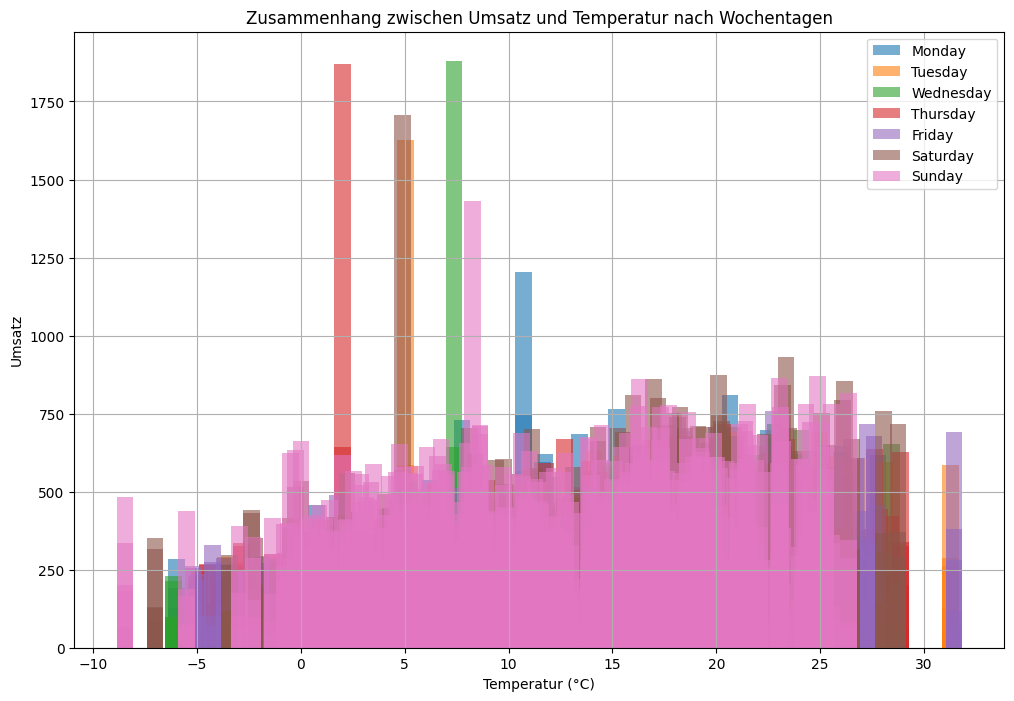

Korrelation zwischen Umsatz und Temperatur nach Wochentagen:
Monday: 0.268
Tuesday: 0.250
Wednesday: 0.250
Thursday: 0.211
Friday: 0.285
Saturday: 0.245
Sunday: 0.128


In [14]:
# Scatter Plot für Umsatz vs. Temperatur, nach Wochentagen gruppiert
plt.figure(figsize=(12,8))
for day in df_final['Wochentag'].unique():
    mask = df_final['Wochentag'] == day
    plt.bar(df_final[mask]['Temperatur'], 
               df_final[mask]['Umsatz'], 
               label=day, 
               alpha=0.6)

plt.title('Zusammenhang zwischen Umsatz und Temperatur nach Wochentagen')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.legend()
plt.grid(True)
plt.show()

# Korrelationsanalyse nach Wochentagen
print("Korrelation zwischen Umsatz und Temperatur nach Wochentagen:")
for day in df_final['Wochentag'].unique():
    korrelation = df_final[df_final['Wochentag'] == day]['Umsatz'].corr(
        df_final[df_final['Wochentag'] == day]['Temperatur']
    )
    print(f"{day}: {korrelation:.3f}")

## Mitschrift sitzung 13.11.25 

Wetter-code nicht metrisch, sondern categorical

prozentuale Veränderung von Tag zu Tag berechnen (s. time series data)
auch: moving averages berechnen für stabilere Werte


wir brauchen

- wann waren Feiertage (Silvester; Weihnachten)? Wann Schulferien? Niederschlag raussuchen?
- Was machen wir mit dem Wettercode? Wofür steht der Code?
- moving averages (kann man darin Wetterumschwung sehen?)
- Temperaturdaten nach Saison unterscheiden 